In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

In [3]:
import matplotlib.pyplot as plt

Random data we want to fit

In [4]:
seconds = 20

In [5]:
time = torch.arange(0, seconds)

In [6]:
speed = torch.randn(seconds)*3 + 0.75*(time-9.5)**2 + 1

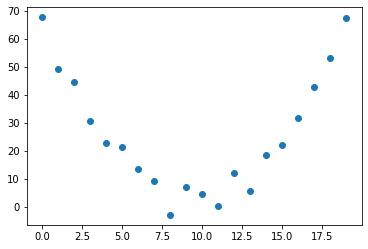

In [7]:
plt.scatter(time, speed)

Function we want to fit : a quadratic function so we can get back the => speed = function(time)

In [8]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

Loss function

In [9]:
def mse(preds, targets): return ((preds-targets)**2).mean()

Step 1. Initalise parameters

In [10]:
no_params = 3 # because a,b,c

In [11]:
params = torch.randn(no_params).requires_grad_()
params

tensor([ 0.0403, -0.7959, -0.2067], requires_grad=True)

In [12]:
params.data

tensor([ 0.0403, -0.7959, -0.2067])

In [13]:
params.grad # no gradients yet

Step 2. Get predictions

In [14]:
preds = f(time, params)

In [15]:
preds.shape

torch.Size([20])

In [16]:
def show_preds(preds, time, speed):
    ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    ax.set_ylim(-200,100)

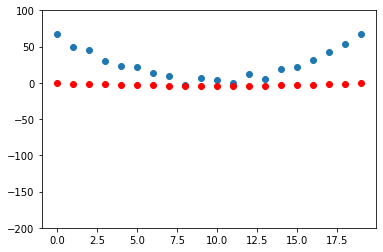

In [17]:
show_preds(preds, time, speed)

Step 3. Calculate Loss

In [18]:
loss = mse(preds, speed)
loss

tensor(1231.0374, grad_fn=<MeanBackward0>)

Step 4. Calculate gradients

In [19]:
params.data

tensor([ 0.0403, -0.7959, -0.2067])

should be no gradients yet

In [20]:
params.grad # no gradients yet

In [21]:
loss.backward() # this does a backprop and updates the gradients for all pytorch vars that requires grads involved in calculating loss

In [22]:
params.grad # now we have gradients

tensor([-8320.9023,  -550.1086,   -57.7930])

Step 5. Update/Step the weights

In [23]:
lr = 1e-5

In [24]:
params.data -= lr * params.grad.data

In [25]:
params.grad = None # empty the gradients for the next round, else it will accumulate over time

In [26]:
preds = f(time, params)

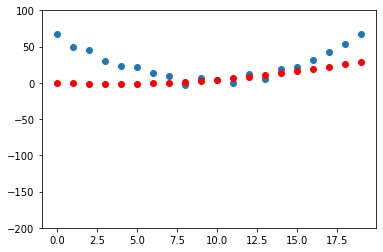

In [27]:
show_preds(preds, time, speed)

Step 6. Repeat the process

In [28]:
def step(params, lr, time, speed):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    #print(loss.item())
    show_preds(preds, time, speed)

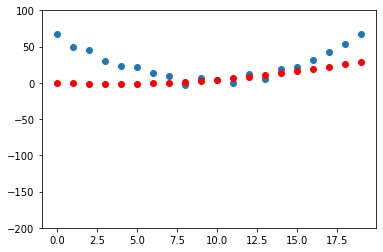

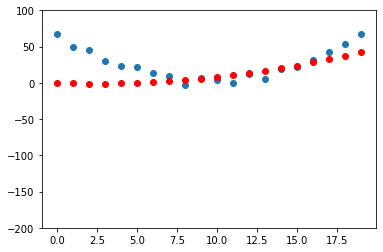

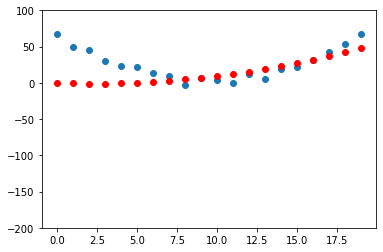

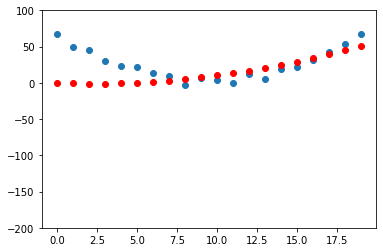

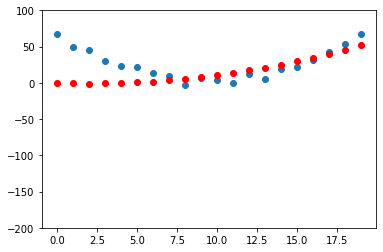

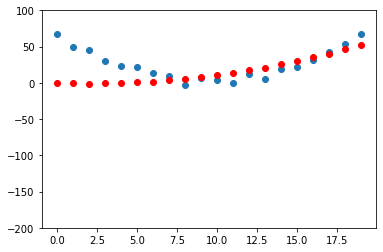

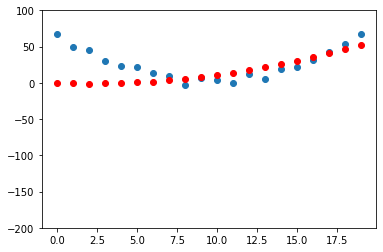

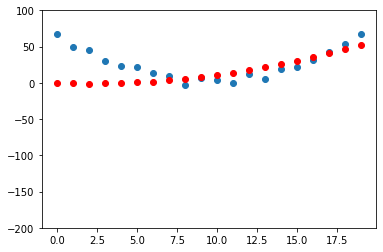

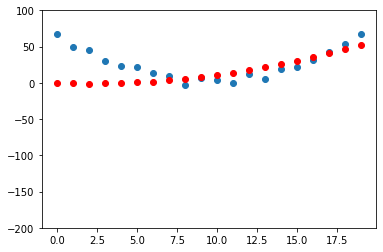

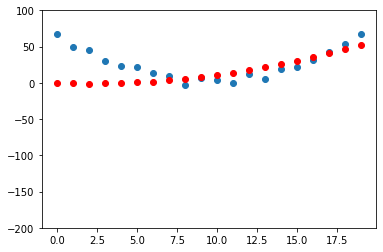

In [29]:
for i in range(10):
    step(params, lr, time, speed)